<a href="https://colab.research.google.com/github/maxMitsuya/previsao_churn/blob/main/Modelo_de_Previs%C3%A3o_de_Churn_para_Plataforma_de_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de Previsão de Churn para Plataforma de Streaming

## Objetivo
Utilize um modelo de classificação para mapear qual o perfil de usuários tem mais chance de deixar sua plataforma de streaming. Compreender quem é o perfil que está aumentando o churn do seu negócio é essencial para tomar ações que reduzam essas perdas, seja alterando critérios na venda ou modificando o produto.

## Contexto
Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

## Sobre os dados

Uma adaptação do problema de ecommerce, disponível no [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?select=E+Commerce+Dataset.xlsx). Acesse os dados aqui:

[streaming_data.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/75a740fb-4146-455a-8d13-6a24ba56d2c8/streaming_data.csv)

Os dados fornecidos possuem informações sobre as contas dos clientes na plataforma de streaming, divididos entre contas Basic, Standard e Premium, onde cada uma oferece uma gama maior de serviços que a anterior.

## Etapa 01) Análise exploratória dos dados (Data Understanding)

In [ ]:
import pandas as pd
import missingno as msno

In [ ]:
df = pd.read_csv('streaming_data.csv')

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
#Análise estatística
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
#Analisando informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


Aqui já vemos que existem muitos dados faltantes na maioria das colunas, vamos analisar os dados faltantes em porcentagem e graficamente. Outra informação importante são os tipos de dados que não estão corretos.

In [ ]:
#Contando valores nulos
df.isna().sum().sort_values(ascending=False)

,0
Num_streaming_services,68312
Subscription_type,25221
Devices_connected,25188
Time_on_platform,21420
Avg_rating,17270
Churned,16736
Gender,14516
Age,11277
Num_active_profiles,0
User_id,0


<Axes: >

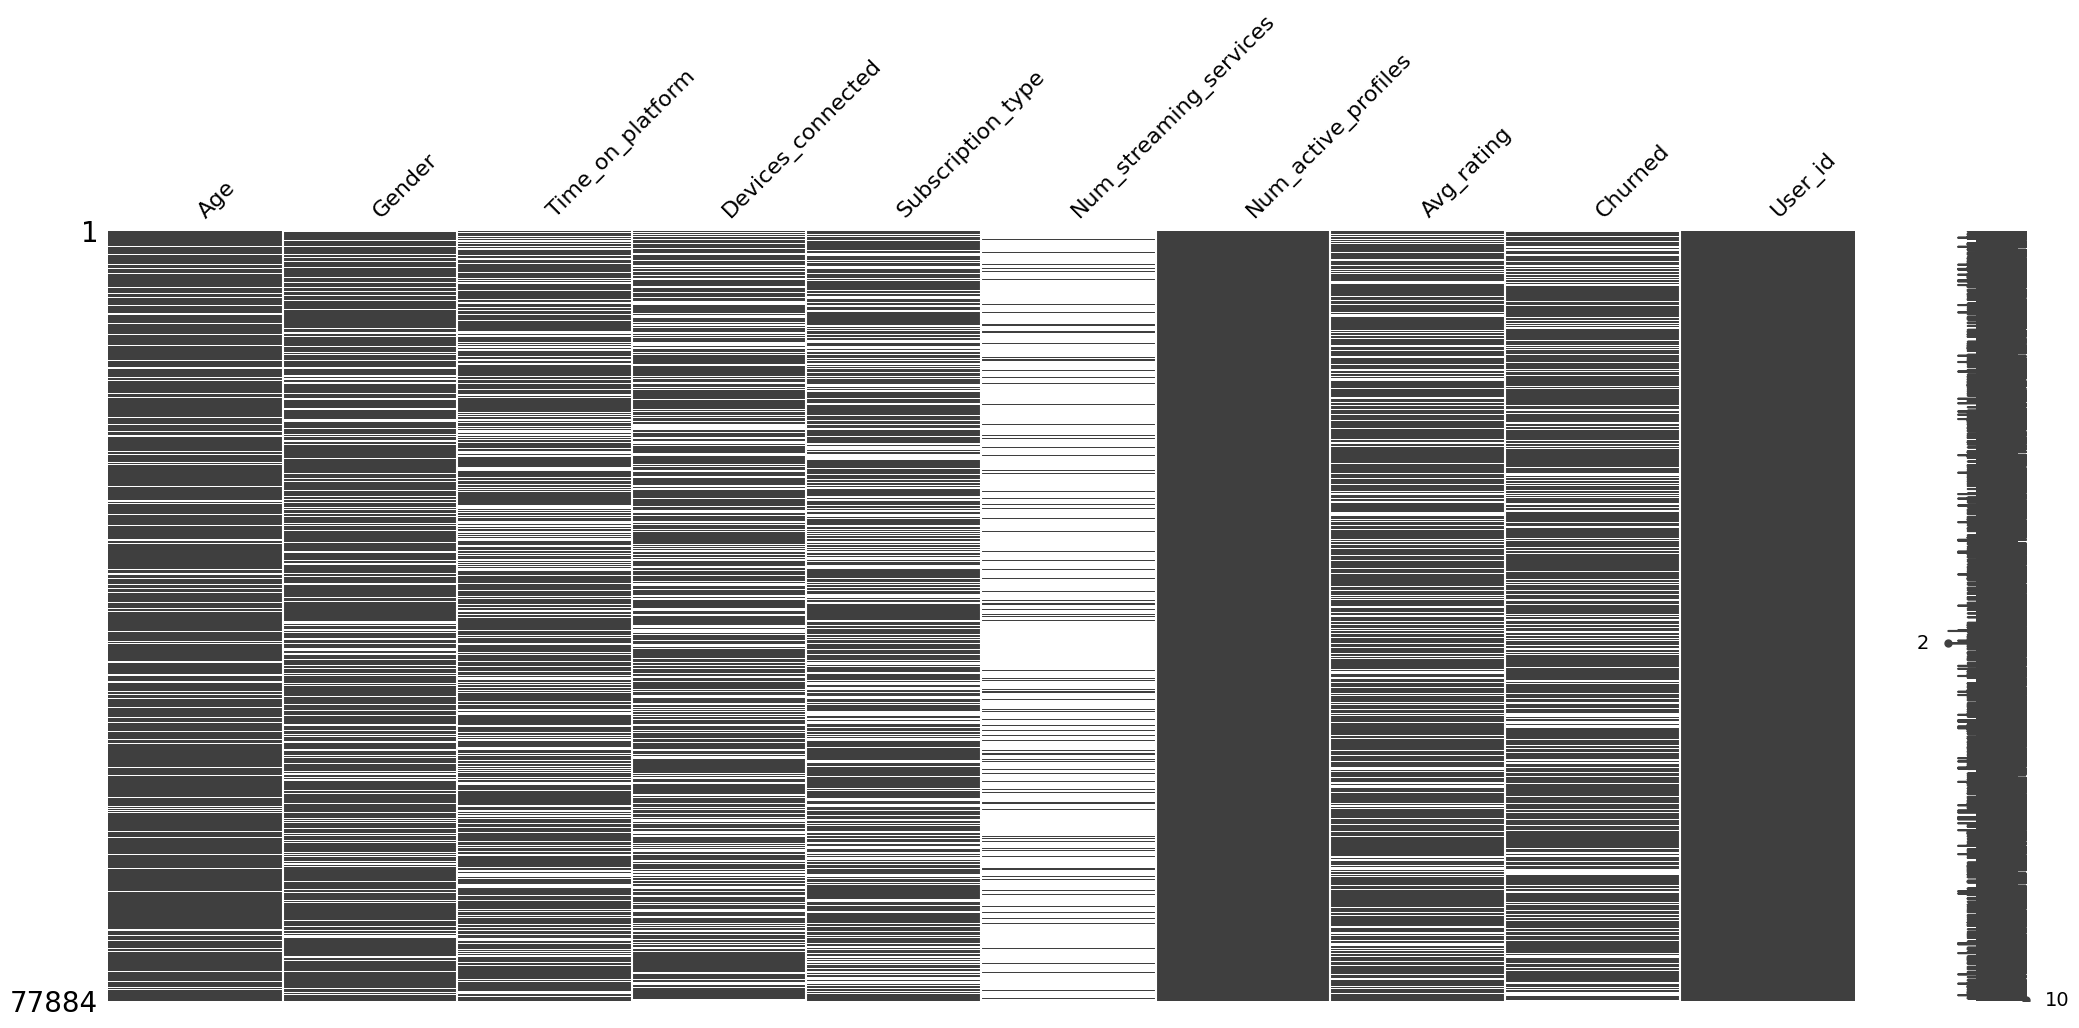

In [ ]:
#Analisando dados faltantes com missigno
msno.matrix(df)

A análise confirma muitos dados faltantes com mais de 80% na coluna num_streaming_service.

## Etapa 02) Tratamento dos Dados (Data Preparation)

In [ ]:
#Substituir valores “NaN” por 0 Colunas → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
df['Time_on_platform'] = df['Time_on_platform'].fillna(0)
df['Num_streaming_services'] = df['Num_streaming_services'].fillna(0)
df['Churned'] = df['Churned'].fillna(0)
df['Avg_rating'] = df['Avg_rating'].fillna(0)
df['Devices_connected'] = df['Devices_connected'].fillna(0)

In [ ]:
#Dropar linhas nulas nas colunas Gender, Subscription_type e Age
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [ ]:
#Analisando os valores nulos após tratamento
df.stb.missing()

,missing,total,percent
Age,0,36515,0.0
Gender,0,36515,0.0
Time_on_platform,0,36515,0.0
Devices_connected,0,36515,0.0
Subscription_type,0,36515,0.0
Num_streaming_services,0,36515,0.0
Num_active_profiles,0,36515,0.0
Avg_rating,0,36515,0.0
Churned,0,36515,0.0
User_id,0,36515,0.0


Agora vemos que não temos dados faltantes no nosso dataframe

In [ ]:
#Transformando valores churned 0 e 1 por No e Yes
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

<ipython-input-152-0f5a03bb0112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:
#Transformando valores floats em valores inteiros
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Avg_rating'] = df['Avg_rating'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)

<ipython-input-153-220c872f09c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
<ipython-input-153-220c872f09c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Devices_connected'] = df['Devices_connected'].astype(int)
<ipython-input-153-220c872f09c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


Todos os tipos de dados foram alterados para os correspondentes aos seus valores. Observação: Na descrição dos dados do desafio, a coluna User_id está com o tipo int, porém os valores apresentados no dataset são do tipo string.

## Etapa 03) Modelagem dos Dados - Regressão Logística

In [ ]:
#Definindo variáveis x e y do modelo
x = df.drop(['User_id', 'Churned'], axis=1)
y = df['Churned'].copy()
y = pd.DataFrame(y)

Nesse caso para as variáveis preditoras não vamos precisar da coluna User_id, visto que não são relevantes para o modelo.

In [ ]:
x.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating
0,49,Male,4700,3,Basic,0,3,0
1,69,Female,6107,2,Standard,0,1,2
2,44,Male,6374,3,Premium,1,1,1
3,26,Male,0,5,Basic,0,2,0
5,54,Male,3024,2,Basic,0,1,0


In [ ]:
y.head()

,Churned
0,No
1,No
2,Yes
3,No
5,No


In [ ]:
#Tratando as variáveis categoricas
x = pd.get_dummies(x, columns = ['Gender'], dtype = int)
x.head()

,Age,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male
0,49,4700,3,Basic,0,3,0,0,1
1,69,6107,2,Standard,0,1,2,1,0
2,44,6374,3,Premium,1,1,1,0,1
3,26,0,5,Basic,0,2,0,0,1
5,54,3024,2,Basic,0,1,0,0,1


In [ ]:
#Coluna Subscription_type possui valores hierarquicos então foi usado o LabelEncoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Subscription_type'] = le.fit_transform(x['Subscription_type'])
x.head()

,Age,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male
0,49,4700,3,0,0,3,0,0,1
1,69,6107,2,2,0,1,2,1,0
2,44,6374,3,1,1,1,1,0,1
3,26,0,5,0,0,2,0,0,1
5,54,3024,2,0,0,1,0,0,1


In [ ]:
#Tratando a variavel churned
le.fit(y['Churned'])
y['Churned'] = le.transform(y['Churned'])

In [ ]:
# separando em train e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
# fit do modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


O modelo apresentou dois avisos de erro, o primeiro em relação ao formato do target e o segundo devido a falta de normalização dos dados preditores.

In [ ]:
#Normalizando dados usando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
#Ajustando o formato dos dados da variável target y
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
#Refazendo o fit após as alterações
lr = model.fit(X_train, y_train)
#Fazendo o predict
lr.predict(X_test)
#Fazendo assign
X_test.assign(Churned = y_test).assign(Predicted = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,Churned,Predicted
11843,0.490196,0.706131,0.6,0.0,0.0,0.75,0.0,0.0,1.0,0,0
12678,0.980392,0.492636,0.6,1.0,0.0,0.75,0.8,1.0,0.0,0,0
35053,0.274510,0.097500,0.0,0.0,0.0,0.00,0.0,1.0,0.0,1,0
36421,0.411765,0.812992,0.0,1.0,0.0,0.25,0.0,1.0,0.0,1,0
19202,0.235294,0.303573,0.8,0.0,0.0,0.75,0.2,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,0.000000,0.8,0.5,0.0,1.00,0.4,0.0,1.0,0,0
29606,0.470588,0.000000,0.0,0.0,0.0,0.50,0.2,1.0,0.0,0,0
35400,0.313725,0.715493,0.6,1.0,0.0,1.00,0.6,1.0,0.0,0,0
7825,0.941176,0.000000,0.2,0.0,0.0,0.50,0.4,0.0,1.0,0,0


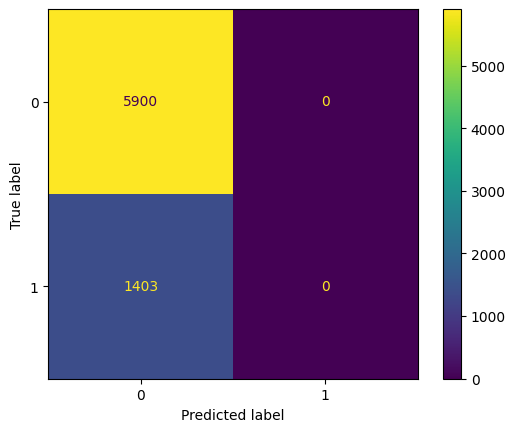

In [ ]:
#Plotar matrix confusão
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

O resultado da matriz confusão indica que o modelo está completamente inviesado (overfiting), sempre classificando como classe 0.

In [ ]:
#Calculando metricas
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print(f'Acurácia treino: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia teste: {accuracy_score(y_test, lr.predict(X_test))}')
print(f'Acurácia balanceada treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia balanceada teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}')
print(f'Precisao treino: {precision_score(y_train, lr.predict(X_train))}')
print(f'Precisao teste: {precision_score(y_test, lr.predict(X_test))}')
print(f'Recall treino: {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall teste: {recall_score(y_test, lr.predict(X_test))}')
print(f'F1 treino: {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 teste: {f1_score(y_test, lr.predict(X_test))}')
print(f'ROC AUC treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'ROC AUC teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

Acurácia treino: 0.8064836368615638
Acurácia teste: 0.8078871696563056
Acurácia balanceada treino: 0.5
Acurácia balanceada teste: 0.5
Precisao treino: 0.0
Precisao teste: 0.0
Recall treino: 0.0
Recall teste: 0.0
F1 treino: 0.0
F1 teste: 0.0
ROC AUC treino: 0.5126396215524236
ROC AUC teste: 0.507129154233664


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As métricas confirmam que o modelo, apesar de ter uma boa acurácia, possui 0 de precisão, recall e f1 score, indicando que os dados são desbalanceados.

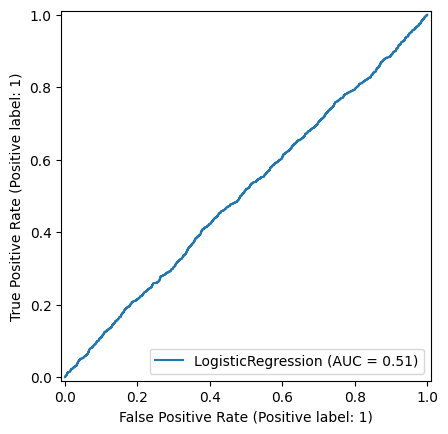

In [ ]:
#Plotando a curva AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, X_test, y_test)

## Etapa 04) Modelagem dos Dados - Tunning

In [ ]:
#Analisando o fator de desbalanceamento das classes a serem preditas
# Contagem de classes
class_counts = pd.Series(y_train).value_counts()

# Porcentagens
class_percent = pd.Series(y_train).value_counts(normalize=True) * 100

pd.DataFrame({
    'Contagem': class_counts,
    'Porcentagem (%)': class_percent.round(2)  # 2 casas decimais
})

,Contagem,Porcentagem (%)
0,23559,80.65
1,5653,19.35


In [ ]:
# Encontrando melhores hiperparametros para o algoritmo Regressão logistica
from sklearn.model_selection import GridSearchCV
parameters = [
    {
        'penalty': ['l1'],
        'C': [0.001, 0.1, 1],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.5, 0.7],
        'max_iter': [100, 200]
    }
]
lr_grid = GridSearchCV(lr, scoring='f1', param_grid=parameters, cv=5)

In [ ]:
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.1, 1], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.1, 1], 'l1_ratio': [0.5, 0.7],
                          'max_iter': [100, 200], 'penalty': ['elasticnet'],
                          'solver': ['saga']}],
             scoring='f1')

In [ ]:
lr_grid.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Ajustando modelo com os melhores hiperparametros
lr = LogisticRegression(
    C=0.001,
    max_iter=100,
    penalty='l1',
    solver='liblinear'
)

In [ ]:
lr = model.fit(X_train, y_train)
#Fazendo o predict
lr.predict(X_test)
#Fazendo assign
X_test.assign(Churned = y_test).assign(Predicted = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,Churned,Predicted
11843,0.490196,0.706131,0.6,0.0,0.0,0.75,0.0,0.0,1.0,0,0
12678,0.980392,0.492636,0.6,1.0,0.0,0.75,0.8,1.0,0.0,0,0
35053,0.274510,0.097500,0.0,0.0,0.0,0.00,0.0,1.0,0.0,1,0
36421,0.411765,0.812992,0.0,1.0,0.0,0.25,0.0,1.0,0.0,1,0
19202,0.235294,0.303573,0.8,0.0,0.0,0.75,0.2,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,0.000000,0.8,0.5,0.0,1.00,0.4,0.0,1.0,0,0
29606,0.470588,0.000000,0.0,0.0,0.0,0.50,0.2,1.0,0.0,0,0
35400,0.313725,0.715493,0.6,1.0,0.0,1.00,0.6,1.0,0.0,0,0
7825,0.941176,0.000000,0.2,0.0,0.0,0.50,0.4,0.0,1.0,0,0


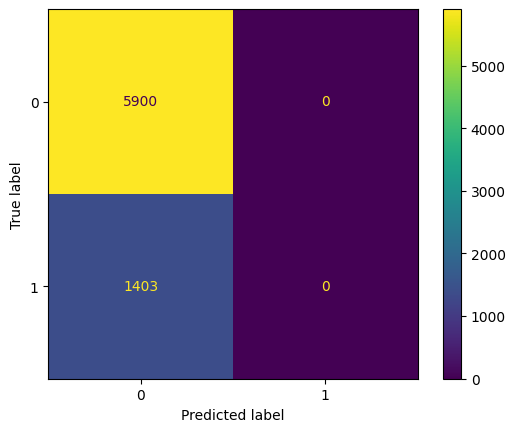

In [ ]:
#Plotando matrix confusão
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [ ]:
#Recalculando métricas
print(f'Acurácia treino: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia teste: {accuracy_score(y_test, lr.predict(X_test))}')
print(f'Acurácia balanceada treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia balanceada teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}')
print(f'Precisao treino: {precision_score(y_train, lr.predict(X_train))}')
print(f'Precisao teste: {precision_score(y_test, lr.predict(X_test))}')
print(f'Recall treino: {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall teste: {recall_score(y_test, lr.predict(X_test))}')
print(f'F1 treino: {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 teste: {f1_score(y_test, lr.predict(X_test))}')
print(f'ROC AUC treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'ROC AUC teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

Acurácia treino: 0.8064836368615638
Acurácia teste: 0.8078871696563056
Acurácia balanceada treino: 0.5
Acurácia balanceada teste: 0.5
Precisao treino: 0.0
Precisao teste: 0.0
Recall treino: 0.0
Recall teste: 0.0
F1 treino: 0.0
F1 teste: 0.0
ROC AUC treino: 0.5126396215524236
ROC AUC teste: 0.507129154233664


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mesmo ajustando os hiperparametros o modelo continua com overfiting.

## Etapa 05) Modelagem dos Dados - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

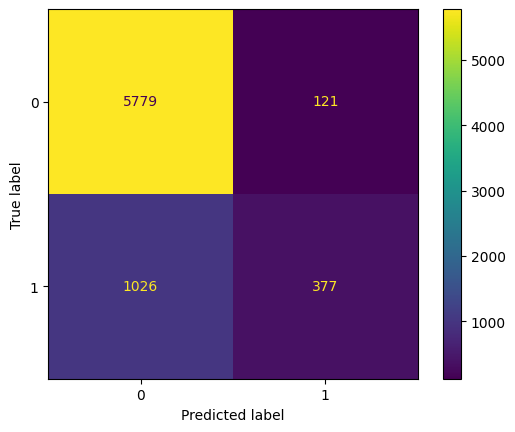

In [ ]:
# Matrix confusão
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
#Calculando métricas
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9945227988497878
Acurácia (Teste): 0.842941257017664
Acurácia Balanceada (Treino): 0.988671684769104
Acurácia Balanceada (Teste): 0.62410071638257
Precision (Treino): 0.9924690693921463
Precision (Teste): 0.7570281124497992
Recall (Treino): 0.9791261277197948
Recall (Teste): 0.26870990734141126
F1-Score (Treino): 0.9857524487978628
F1-Score (Teste): 0.39663335086796425
ROCAUC (Treino): 0.9997965069980577
ROCAUC (Teste): 0.6912911195138746


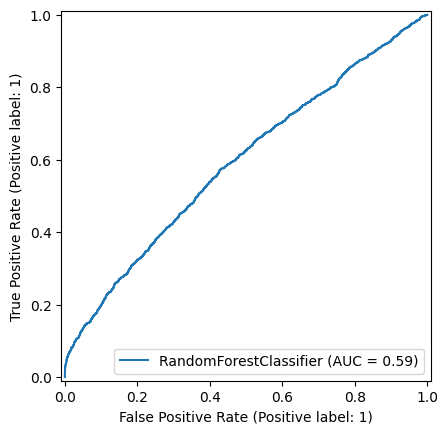

In [ ]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
# Fazendo tunning
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'class_weight': [ 'balanced']
}

grid_search = GridSearchCV(rf, parameters, scoring= 'f1', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Ajustando modelo com melhores hiperparametros

rf = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha = 0.0,
    class_weight='balanced',
    criterion = 'gini',
    max_depth=10,
    max_features='sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf = 0.0,
    monotonic_cst = None,
    n_estimators =  300,
    n_jobs = None,
    oob_score = False,
    random_state = None,
    verbose = 0,
    warm_start = False
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)

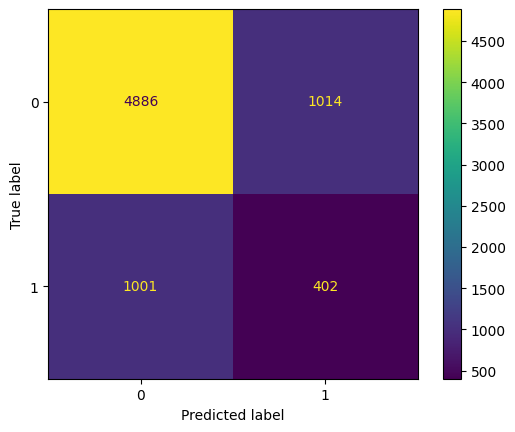

In [ ]:
# Matrix confusão
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
#Calculando métricas
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8438655347117623
Acurácia (Teste): 0.7240859920580583
Acurácia Balanceada (Treino): 0.7854217503781582
Acurácia Balanceada (Teste): 0.5573322299672614
Precision (Treino): 0.5813710879284649
Precision (Teste): 0.2838983050847458
Recall (Treino): 0.6900760658057669
Recall (Teste): 0.28652886671418387
F1-Score (Treino): 0.6310765995308582
F1-Score (Teste): 0.285207520397304
ROCAUC (Treino): 0.88990190625135
ROCAUC (Teste): 0.5924713990601254


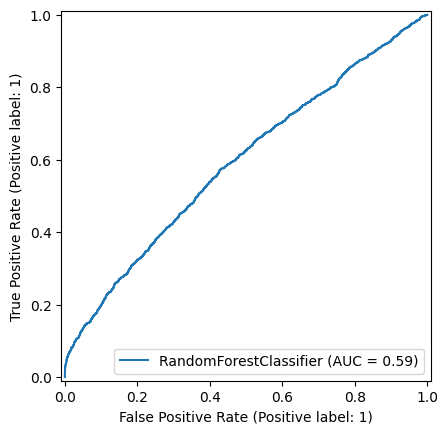

In [ ]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

Mesmo ajustando os hiperparametros não melhorou muito as métricas. O que indica que o problema maior está no balanceamento dos dados.

## Melorando o balanceamento

In [ ]:
# Random Forest com foco na classe minoritária
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=100,
    sampling_strategy='auto',
    random_state=42
)

In [ ]:
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42, sampling_strategy='auto')

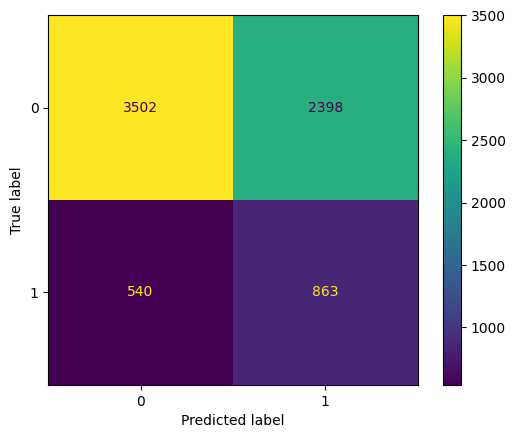

In [ ]:
#Plotando matrix confusão
ConfusionMatrixDisplay.from_estimator(brf, X_test, y_test)

In [ ]:
#Calculando métricas
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8438655347117623
Acurácia (Teste): 0.7240859920580583
Acurácia Balanceada (Treino): 0.7854217503781582
Acurácia Balanceada (Teste): 0.5573322299672614
Precision (Treino): 0.5813710879284649
Precision (Teste): 0.2838983050847458
Recall (Treino): 0.6900760658057669
Recall (Teste): 0.28652886671418387
F1-Score (Treino): 0.6310765995308582
F1-Score (Teste): 0.285207520397304
ROCAUC (Treino): 0.88990190625135
ROCAUC (Teste): 0.5924713990601254


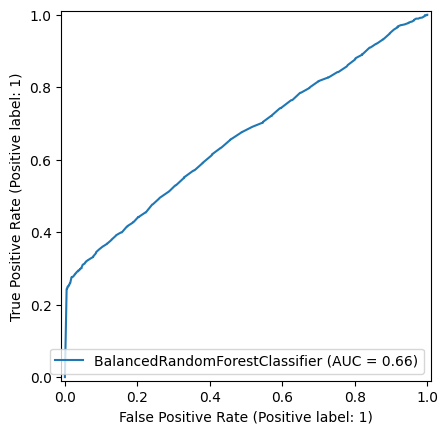

In [ ]:
RocCurveDisplay.from_estimator(brf, X_test, y_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
brf.fit(X_res, y_res)

BalancedRandomForestClassifier(random_state=42, sampling_strategy='auto')

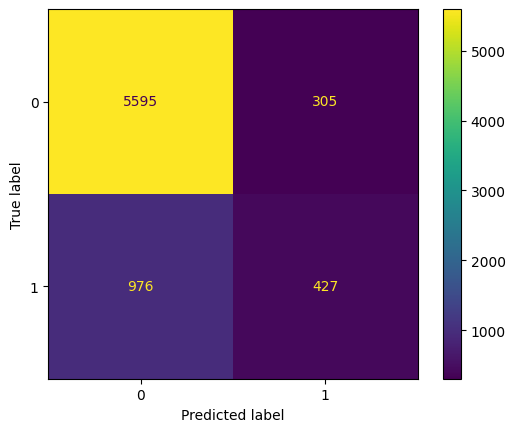

In [ ]:
#Plotando matrix confusão
ConfusionMatrixDisplay.from_estimator(brf, X_test, y_test)

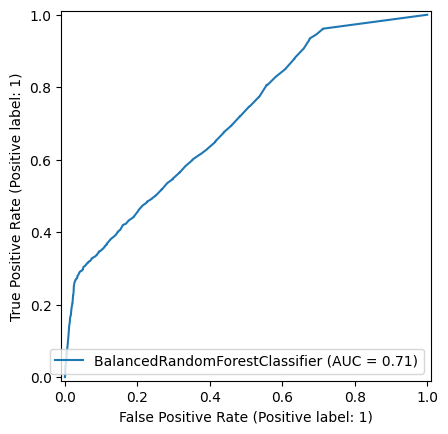

In [ ]:
RocCurveDisplay.from_estimator(brf, X_test, y_test)

In [ ]:
#Calculando métricas
print(f"Acurácia (Treino): {accuracy_score(y_res, rf.predict(X_res))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_res, rf.predict(X_res))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_res, rf.predict(X_res))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_res, rf.predict(X_res))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_res, rf.predict(X_res))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_res, rf.predict_proba(X_res)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7184303238677363
Acurácia (Teste): 0.7240859920580583
Acurácia Balanceada (Treino): 0.7184303238677363
Acurácia Balanceada (Teste): 0.5573322299672614
Precision (Treino): 0.8234443746071654
Precision (Teste): 0.2838983050847458
Recall (Treino): 0.556093212784923
Recall (Teste): 0.28652886671418387
F1-Score (Treino): 0.6638627783830348
F1-Score (Teste): 0.285207520397304
ROCAUC (Treino): 0.8247306338884396
ROCAUC (Teste): 0.5924713990601254


In [ ]:
X_res.assign(Churned = y_res).assign(Predicted = brf.predict(X_res))

,0,1,2,3,4,5,6,7,8,Churned,Predicted
0,0.294118,0.000000,0.800000,1.0,0.000000,0.500000,0.800000,1.0,0.0,1,1
1,0.490196,0.696541,0.600000,1.0,0.250000,0.000000,0.600000,1.0,0.0,0,0
2,0.235294,0.895650,0.000000,0.5,0.000000,0.250000,0.000000,1.0,0.0,0,0
3,0.549020,0.200365,0.000000,0.5,0.000000,1.000000,0.400000,0.0,1.0,0,0
4,0.529412,0.307227,0.800000,1.0,0.000000,0.500000,0.800000,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
47113,0.882353,0.475787,0.018795,0.0,1.000000,0.773493,0.562411,0.0,1.0,1,1
47114,0.861268,0.000000,0.400000,0.0,0.000000,0.743724,0.800000,1.0,0.0,1,1
47115,0.793454,0.210618,0.400000,0.5,0.000000,0.000000,0.600000,1.0,0.0,1,1
47116,0.583786,0.000000,0.845386,0.5,0.193268,1.000000,0.000000,1.0,0.0,1,1


## Avaliação

O dataset apresenta uma distribuição das classes de churn muito desbalanceadas, 80/20, isso faz com que todos os modelos performem com overfitting.
O algoritmo de regressão logistica não conseguiu sair do overfitting mesmo usando melhorias nos hiperparametros.
O Random Forest melhorou suas métricas porém ainda apresentou overfitting.
Assim, foi testando duas abordagens, a primeira usando o algoritmo BalancedRandomForest próprio para dados desbalanceados juntamente com uma rotina de reamostragem usando SMOTE.
O resultado foi uma melhora na curva ROCAUC de 0,5 (regressão logística) para 0,71.